<a href="https://colab.research.google.com/github/pratyush-17/APPLE-stock-prediction-LSTM/blob/master/language_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [3]:
from fastai.text import *


In [4]:
import os
%tensorflow_version 2.x

import tensorflow as tf
print(tf.__version__)
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

2.8.0


SystemError: ignored

In [5]:
import pandas as pd
import numpy as np


In [6]:
train_set=pd.read_csv("/content/drive/MyDrive/SHL-ASSIGNMENT/Dataset/train_data.csv")
train_set.sample(10)


,input,labels
4003,I had to spend a lot of time in front of it .,1
13839,Could you please listen to it ?,0
7462,A Let is have a dinner .,0
5184,"On the weekend I had a high fever , so I could...",0
19953,So I am reading book about the history of Bel ...,0
15533,So he made a bridge on the river and allowed t...,1
12124,"After gathering , we went to the Korean restau...",1
2215,So you can enjoy them .,0
15499,A daily exercise .,0
19580,I will regret it .,1


In [7]:
from sklearn.model_selection import train_test_split

#new_train_set, new_val_set= train_test_split(train_set,test_size=0.10,shuffle=False)

In [7]:
val_set = pd.read_csv("/content/drive/MyDrive/SHL-ASSIGNMENT/Dataset/val_data.csv")

val_set.sample(10)

,input,labels
724,Summer will be finish soon .,0
1106,This is my homework for my English class .,1
9151,Reading and studying those written or unwritte...,1
5604,". Haha , I think you know what I mean ,",0
1739,The reasons why I do think so are mainly in th...,1
816,I want to sleep,1
7908,It consists of some mushroom called chasoo .,1
2502,I spent a time there short while .,0
9038,I was interested in the town because I heard t...,1
8283,"this morning , i finally came back school from...",0


In [8]:

path = "/content/drive/MyDrive/SHL-ASSIGNMENT/Dataset"
data_lm = TextLMDataBunch.from_df(path,train_df=train_set,valid_df= val_set ,label_cols='labels',text_cols='input')
data_clas = TextClasDataBunch.from_df(path,valid_df= val_set,train_df=train_set, vocab=data_lm.train_ds.vocab,label_cols='labels',text_cols='input', bs=32)
data_lm.train_ds.vocab

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [10]:
print('getcwd:', os.getcwd())


getcwd: /content


In [9]:
data_lm.save('/content/drive/MyDrive/SHL-ASSIGNMENT/data_lm_export.pkl')
data_clas.save('/content/drive/MyDrive/SHL-ASSIGNMENT/data_clas_export.pkl')

In [10]:
bs=32
data_lm = load_data('/content/drive/MyDrive/SHL-ASSIGNMENT', 'data_lm_export.pkl', bs=bs)
data_clas = load_data('/content/drive/MyDrive/SHL-ASSIGNMENT', 'data_clas_export.pkl', bs=bs)

/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [13]:
len(data_clas.vocab.itos) == len(data_lm.vocab.itos)

True

In [11]:
data_clas.show_batch()

/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


text,target
"xxbos xxmaj xxunk xxmaj xxunk xxmaj to check whether the meeting records of the xxmaj board of xxmaj directors and xxmaj special xxmaj committee were complete and signed by directors who attended the meetings . xxmaj to check the contents , deadline and xxunk of the formal written authorization of xxunk representatives . xxmaj to check whether xxunk of authority were written in letters of authorization by the directors ,",0
"xxbos i was wondered why she did not invite her best friend xxmaj bio . . xxmaj and i said , xxmaj that is ok , if it is just come to school early . xxmaj after it , she said , xxmaj oh , i remember that i have no time to come to school early , because i have something must to do before i go to school",0
"xxbos xxmaj however , i inferred that she was afraid that she could complete her mission without troubles , because what she had is just one piece of paper that described hand - wrote map to the customer is office that is more than a hundred miles far from our office , and contact person name .",0
"xxbos xxmaj toward the end of the xxunk century , with the union of xxmaj castile and xxmaj aragon that extended their control over most parts of the peninsula , the xxmaj spanish language had been imposing over other languages and dialects and crossed the xxmaj atlantic through xxunk , xxunk and missionaries .",1
"xxbos xxmaj as for me , the experience of going aboard is xxunk a great opportunity to xxunk my xxunk by meeting people from different countries with various cultures , which means that i will have a chance to learn from top students all over the world .",1


In [11]:
torch.cuda.set_device(0)


In [12]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5)


In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


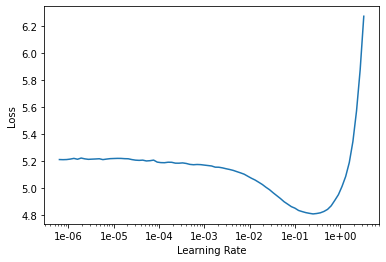

In [64]:
learn.recorder.plot()


In [66]:
learn.fit_one_cycle(10,1e-01/2)


epoch,train_loss,valid_loss,accuracy,time
0,2.712952,3.365623,0.366107,00:39
1,2.945164,3.530398,0.348625,00:38
2,3.244603,3.651938,0.337752,00:38
3,3.277320,3.628259,0.339833,00:38
4,3.165741,3.586954,0.346789,00:38
5,2.993561,3.533689,0.354702,00:38
6,2.827457,3.462563,0.364466,00:38
7,2.643651,3.409074,0.374741,00:38
8,2.500187,3.378631,0.380451,00:38
9,2.421687,3.375801,0.380652,00:38


In [35]:
learn.save("/content/drive/MyDrive/SHL-ASSIGNMENT/language_model", return_path=True)

PosixPath('/content/drive/MyDrive/SHL-ASSIGNMENT/language_model.pth')

In [36]:
learn.save_encoder('/content/drive/MyDrive/SHL-ASSIGNMENT/language_model_encoder')



In [37]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5,metrics=accuracy)
learn.load_encoder('/content/drive/MyDrive/SHL-ASSIGNMENT/language_model_encoder')
learn.freeze()

In [38]:
data_clas.show_batch()

/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


text,target
"xxbos xxmaj xxunk xxmaj xxunk xxmaj to check whether the meeting records of the xxmaj board of xxmaj directors and xxmaj special xxmaj committee were complete and signed by directors who attended the meetings . xxmaj to check the contents , deadline and xxunk of the formal written authorization of xxunk representatives . xxmaj to check whether xxunk of authority were written in letters of authorization by the directors ,",0
"xxbos xxmaj however , i inferred that she was afraid that she could not complete her mission without trouble , because what she had was just one piece of paper that described a hand - wrote map to the customer is office which is more than a hundred miles away from our office , and a contact person is name .",1
"xxbos xxmaj my friend is a doctor and the place where we met was beside a hospital . xxmaj my friend told me that he met this kind of thing often , and he suggested the couple ask other people if they could help them . xxmaj we did not know where the xxmaj red xxmaj cross was .",1
"xxbos xxmaj hi , i am a student for product design is master degree , and i have xxunk a work i call it xxmaj finger xxmaj dance , which is a kind of digital communication equipment for cold xxunk , and be suitable for outdoor survival and xxunk in the ice - disaster or snowstorm .",0
"xxbos xxmaj as i feel i have enough motivation to write , i am so xxunk that nothing is coming up to me , but i just want to say thanks to all the people on lang - , not only those who corrected my journal but also all the xxunk on this site .",0


In [39]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


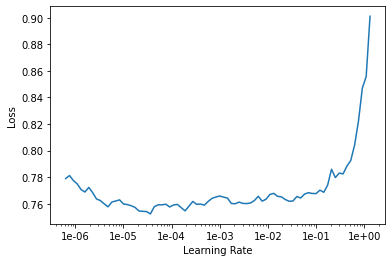

In [40]:
learn.recorder.plot()

In [42]:
learn.fit_one_cycle(2, 1e-04)

epoch,train_loss,valid_loss,accuracy,time
0,0.726273,0.699074,0.506800,00:29
1,0.713843,0.697798,0.507100,00:32


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must

In [23]:
data_clas.show_batch()

/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


text,target
"xxbos xxmaj xxunk xxmaj xxunk xxmaj to check whether the meeting records of the xxmaj board of xxmaj directors and xxmaj special xxmaj committee were complete and signed by directors who attended the meetings . xxmaj to check the contents , deadline and xxunk of the formal written authorization of xxunk representatives . xxmaj to check whether xxunk of authority were written in letters of authorization by the directors ,",0
"xxbos xxmaj for example , xxmaj if you want to be someone in life you have to go through many obstacles whether personally and in terms of work , if we are to succeed in your life have to be much effort in the end all sacrifice has its rewards .",0
"xxbos xxmaj it was an old movie theater , so old that i could not help wondering if there would suddenly be a fire accident or something , and food was xxunk , so i bought in fried chicken and milk tea , which was mixed with red beans .",1
xxbos xxmaj it is xxunk xxup ok if we use a head - set to talk on the phone in a car but it is too much of a bother to put on a head - set xxunk we get a phone call when we are driving .,0
"xxbos xxmaj without anyone to tell them otherwise , xxunk developed the xxunk that i m being treated this way because of the color of my skin , when in fact , xxmaj freshmen in college are generally treated like xxunk , because they re xxmaj freshmen .",1


In [43]:
learn.freeze_to(-1)


In [44]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


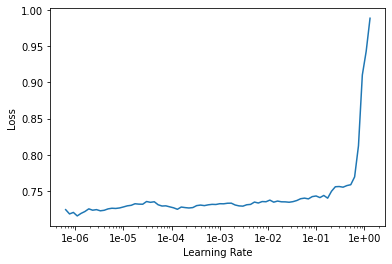

In [45]:
learn.recorder.plot()

In [46]:
learn.fit_one_cycle(3, slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.719166,0.697447,0.507400,00:32
1,0.712620,0.696510,0.509400,00:32
2,0.710913,0.696949,0.510000,00:32


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must

In [47]:
learn.freeze_to(-2)
learn.fit_one_cycle(3, slice(1e-4, 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.703242,0.699522,0.511000,00:38
1,0.693671,0.691067,0.533500,00:34
2,0.687615,0.690050,0.529400,00:37


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must

In [48]:
learn.unfreeze()
learn.fit_one_cycle(5, slice(1e-4, 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.694878,0.697083,0.480800,01:11
1,0.694099,0.692238,0.521300,01:12
2,0.683876,0.700447,0.530000,01:06
3,0.672585,0.701742,0.523900,01:04
4,0.663757,0.715962,0.515600,01:09


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must

In [54]:
learn.predict(' required by law ')


(Category tensor(0), tensor(0), tensor([0.6768, 0.3232]))

In [56]:
learn.predict('but to do anything ')

(Category tensor(0), tensor(0), tensor([0.6012, 0.3988]))

In [62]:
test_data=pd.read_csv("/content/drive/MyDrive/SHL-ASSIGNMENT/Dataset/test_data.csv")
test_data


,input
0,I believe they will master Japanese soon becau...
1,I am looking for it .
2,Apple is a round fruit with smooth and colorfu...
3,Let It Will Be Push .
4,I rode on this ship from Sendai .
...,...
9967,Lang is growing up and improving step by step !
9968,I was away from my housework for about days .
9969,The conflict is so serious .
9970,An apple is a round fruit with smooth and colo...


ValueError: ignored

In [1]:
final_result = pd.Series(final_result,name='labels')

NameError: ignored

In [49]:
final_result = final_result.to_frame()
final_result

,labels
0,1
1,tensor(1)
2,"[tensor(3.4110e-11), tensor(1.)]"


In [43]:
final_result.shape

(3, 1)

In [82]:
preds = []
for i in range(0,30):
    p = learn.predict(test_data.input)
    preds.append(str(p[1]))

print(preds)

KeyboardInterrupt: ignored

In [77]:
test_df = pd.read_csv("/content/drive/MyDrive/SHL-ASSIGNMENT/Dataset/test_data.csv")
learn.data.add_test(test_df[input])
prob_preds = learn.get_preds(ds_type=DatasetType.Test, ordered=True)

ValueError: ignored